In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
my_df = pd.read_excel('commodity.xlsx')

In [11]:
my_df['Dates'] = pd.to_datetime(my_df['Dates'], dayfirst=False)
my_df.set_index('Dates', inplace=True)

In [12]:
my_df

,WLC1,O91,YUR1,IY1,T31,Y01,CCL1,S91,E61,U51,...,C71,H01,Q81,G01,GX1,INB1,T21,Q61,C21,IBW1
Dates,,,,,,,,,,,,,,,,,,,,,
2010-01-01,375.00,104.25,NaN,1164.7,2501,343.80,NaN,366.7,2385.5,16686,...,1237.0,2543,2401.5,14823.0,664.6,NaN,1311.0,NaN,5824,NaN
2010-01-04,371.25,104.50,NaN,1213.1,2443,347.35,NaN,373.3,2403.5,16830,...,1221.5,2482,2418.5,14758.0,659.0,NaN,1327.8,NaN,5718,NaN
2010-01-05,370.25,105.70,NaN,1261.6,2458,347.35,NaN,373.3,2403.5,16833,...,1222.0,2503,2406.5,14453.0,655.6,NaN,1324.8,NaN,5705,NaN
2010-01-06,373.75,107.70,NaN,1312.1,2431,351.60,NaN,374.9,2379.5,16865,...,1216.5,2470,2391.5,14337.0,651.3,NaN,1326.6,NaN,5583,NaN
2010-01-07,388.25,105.05,NaN,1364.6,2406,345.85,NaN,367.7,2342.0,16827,...,1204.0,2447,2335.5,13782.0,639.1,NaN,1334.2,NaN,5559,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,473.50,179.10,1328.6,1450.0,4220,673.70,21090.0,1060.6,3292.5,45111,...,2366.0,8028,5832.0,14760.0,924.5,392.0,1865.0,8430.0,5898,1489.0
2021-03-29,473.50,177.95,1328.6,1450.0,4220,669.25,21380.0,1066.2,3292.5,44698,...,2366.0,8028,5832.0,14760.0,924.5,392.0,1865.0,8430.0,5898,1489.0
2021-03-30,473.50,176.25,1328.6,1450.0,4220,665.50,21410.0,1053.8,3292.5,44423,...,2396.0,8028,5935.0,14770.0,924.5,392.0,1834.0,8568.0,5898,1489.0


In [13]:
my_df=my_df.dropna()

In [5]:
start=my_df.head(1).values
end=my_df.tail(1).values

In [6]:
start=np.array(start)
end=np.array(end)

In [7]:
start=start[0]
end=end[0]

In [8]:
ret=[]
for i in range(start.size):
    m=np.log(end[i])-np.log(start[i])
    m=m*100
    ret.append(m)

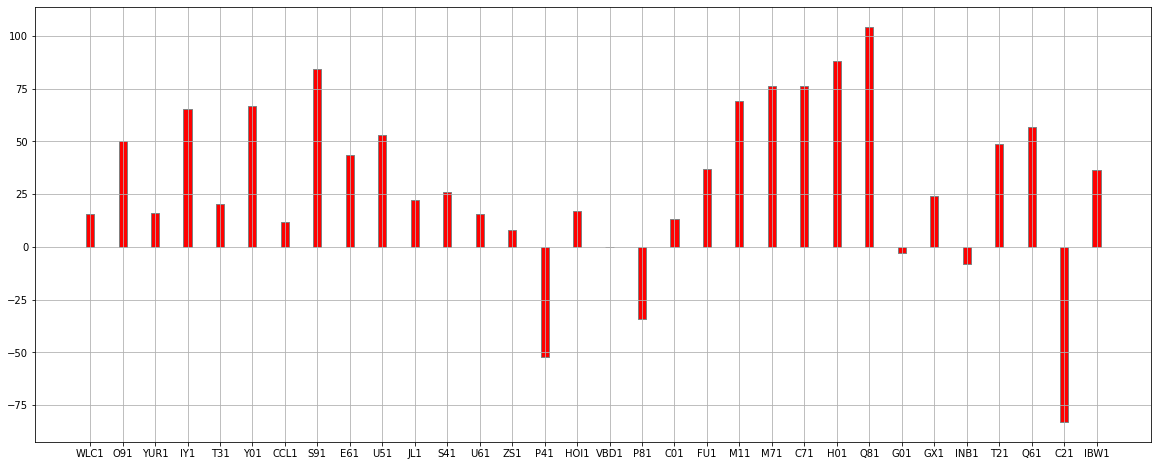

In [9]:
barWidth = 0.25
fig = plt.subplots(figsize =(20, 8))
 
# set height of bar
IT = ret
#ECE = my_df.columns.values
#CSE = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
br1 = my_df.columns.values
#br2 = [x + barWidth for x in br1]
#br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='Fund_Return')
plt.grid()

In [11]:
ret=np.array(ret)


In [12]:
my_df.columns.values

array(['WLC1', 'O91', 'YUR1', 'IY1', 'T31', 'Y01', 'CCL1', 'S91', 'E61',
       'U51', 'JL1', 'S41', 'U61', 'ZS1', 'P41', 'HOI1', 'VBD1', 'P81',
       'C01', 'FU1', 'M11', 'M71', 'C71', 'H01', 'Q81', 'G01', 'GX1',
       'INB1', 'T21', 'Q61', 'C21', 'IBW1'], dtype=object)

In [14]:
mom_period = 126
rebal_freq = 22

In [15]:
my_df_pct = my_df.pct_change(mom_period)

In [16]:
#my_df_pct['AAPL'].iloc[126]

In [17]:
my_df_pct = my_df_pct[mom_period:]

In [18]:
my_df_ranks = pd.DataFrame(columns=my_df_pct.columns, index=my_df_pct.index)

In [19]:
def my_modulo(a, b):

    while a >= b:
        a -= b

    return a

In [20]:
for i in range(len(my_df_pct)):

    if i % rebal_freq == 0:

        my_df_ranks.iloc[i] = my_df_pct.iloc[i].rank(axis=0, ascending=False)

In [21]:
for i in range(len(my_df_pct)):
    if i % rebal_freq == 0:
        my_df_ranks.iloc[i] = my_df_pct.iloc[i].rank(axis=0, ascending=False)

In [22]:
my_df_ranks = my_df_ranks.shift(periods=1, axis=0)

In [23]:
my_df_ranks.ffill(inplace=True)

In [24]:
num_long = 5
num_short = 5
num_stocks = my_df_ranks.shape[1] - num_short + 1

In [25]:
for col in my_df_ranks.columns:

    # if a stock has a rank in the top num_long values, we go long
    my_df_ranks.loc[my_df_ranks[col] <= num_long, col] = 1

    # if a stock has a rank in the bottom num_short values, we go short
    #my_df_ranks.loc[my_df_ranks[col] >= num_stocks, col] = -1

    # if a stock doesn't have a ranking in top or bottom n values, we have no position
    my_df_ranks.loc[ (my_df_ranks[col] > num_long), col] = None

In [26]:
mult_df = (my_df.pct_change()) * my_df_ranks

In [27]:
mult_df['Total Return'] = (mult_df.sum(axis=1, skipna=True)) / (num_long)
mult_df = mult_df[mom_period:]

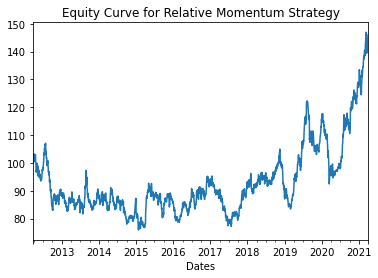

In [28]:
mult_df['Momentum'] = ((mult_df['Total Return'] + 1).cumprod()) * 100

mult_df['Momentum'].plot()
plt.title('Equity Curve for Relative Momentum Strategy')
plt.show()

In [29]:
data=mult_df[['Total Return','Momentum']]

In [21]:
data.to_excel('mom.xlsx')

In [30]:
data['RV']=data['Total Return'].rolling(126).var()
#data['RV']=data['RV']*100

<ipython-input-30-2cc106f001d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RV']=data['Total Return'].rolling(126).var()


In [31]:
data['RV']=np.sqrt(data['RV'])

<ipython-input-31-72691f87828a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RV']=np.sqrt(data['RV'])


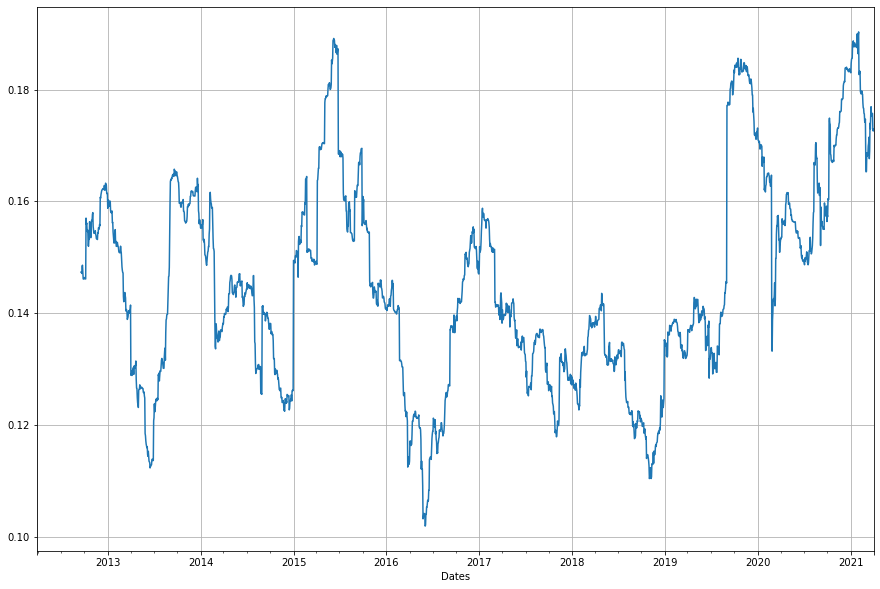

In [34]:
plt.figure(figsize=(15,10))
data['RV'].plot()
plt.grid()

In [33]:
data['RV']=data['RV']*np.sqrt(252)

<ipython-input-33-1daaa3993c87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RV']=data['RV']*np.sqrt(252)


In [35]:
data1=data.dropna()

In [36]:
data1['target']=0.15/data['RV']

<ipython-input-36-ba8de8936716>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['target']=0.15/data['RV']


In [37]:
data1['tr']=data1['Total Return']*data1['target']

<ipython-input-37-82162bb6df79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['tr']=data1['Total Return']*data1['target']


In [38]:
data1

,Total Return,Momentum,RV,target,tr
Dates,,,,,
2012-09-18,-0.020095,87.735414,0.147329,1.018129,-0.020460
2012-09-19,0.000000,87.735414,0.147329,1.018129,0.000000
2012-09-20,-0.002982,87.473756,0.147081,1.019845,-0.003042
2012-09-21,-0.015865,86.085946,0.148367,1.011007,-0.016040
2012-09-24,-0.015503,84.751318,0.148558,1.009709,-0.015654
...,...,...,...,...,...
2021-03-26,0.017612,143.374099,0.175744,0.853516,0.015032
2021-03-29,0.002466,143.727636,0.175718,0.853640,0.002105
2021-03-30,0.000851,143.849893,0.173000,0.867050,0.000738


In [144]:
data1['Momentum'] = ((data1['Total Return'] + 1).cumprod()) * 100

<ipython-input-144-b782c9925f96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Momentum'] = ((data1['Total Return'] + 1).cumprod()) * 100


In [40]:
df=data1['tr']

In [145]:
data1['vol_Momentum'] = ((data1['tr'] + 1).cumprod()) * 100

<ipython-input-145-db9e66ba258f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['vol_Momentum'] = ((data1['tr'] + 1).cumprod()) * 100


<Figure size 1080x720 with 0 Axes>

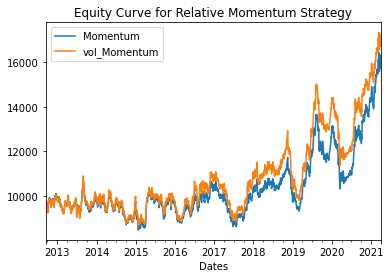

In [95]:
plt.figure(figsize=(15,10))
data1=data1[['Momentum','vol_Momentum']]
data1.plot()
plt.title('Equity Curve for Relative Momentum Strategy')
plt.show()

In [97]:
data1.to_excel('mom1.xlsx')

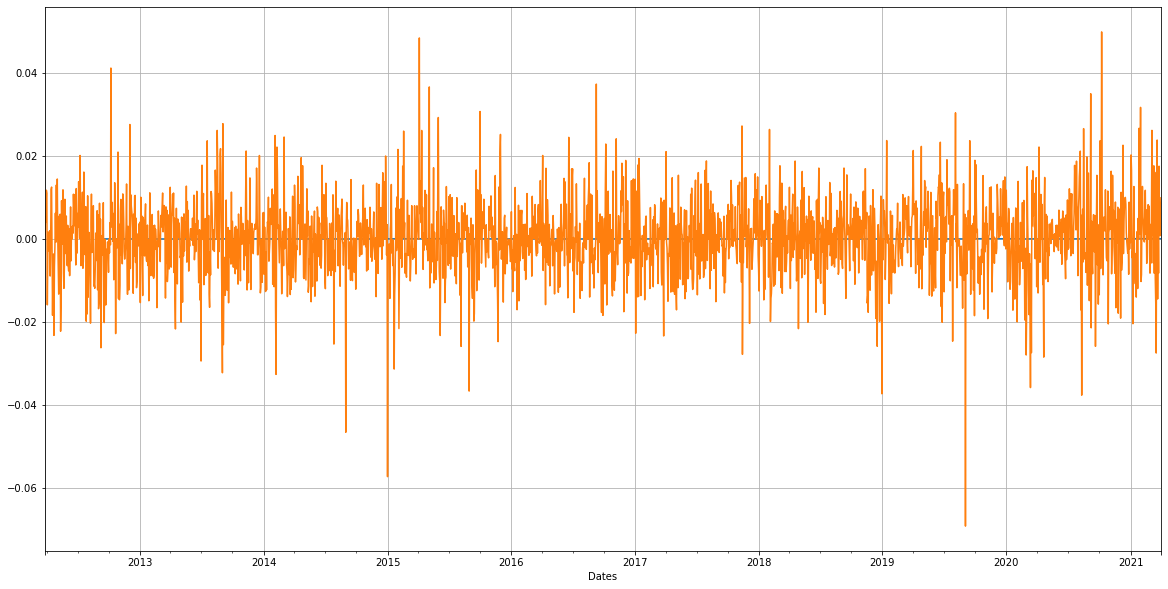

In [31]:
plt.figure(figsize=(20,10))
data['RV'].plot()
data['Total Return'].plot()
plt.grid()

In [84]:
data['monthly_RV']=data['RV'].rolling(22).sum()

<ipython-input-84-40a2a83e1c17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['monthly_RV']=data['RV'].rolling(22).sum()


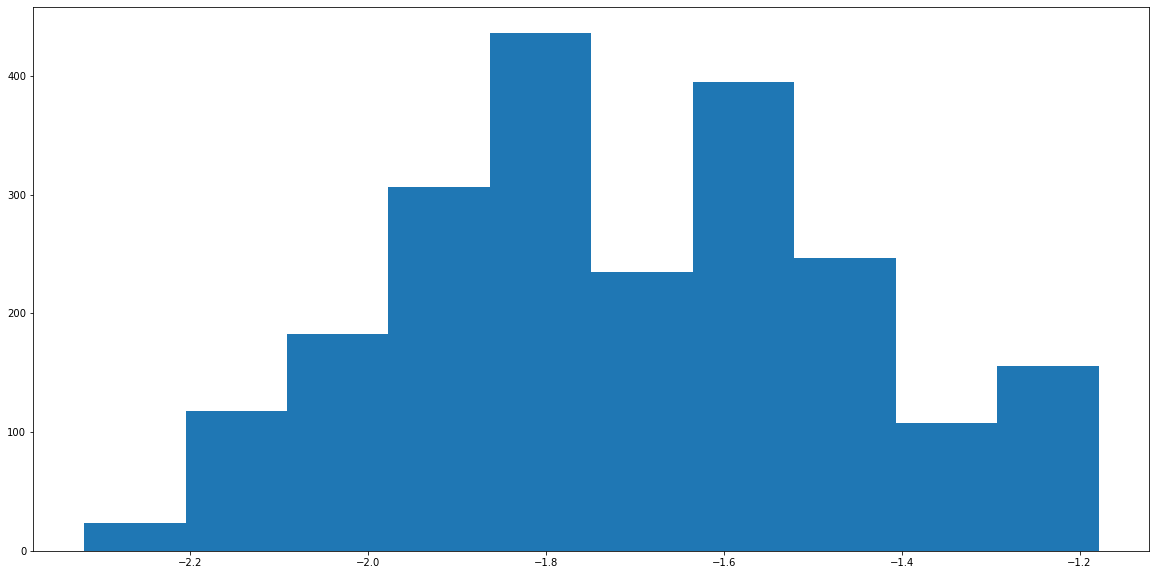

In [86]:
plt.figure(figsize=(20,10))
data['log_m'].hist()
plt.grid()

In [146]:
data['log_m']=np.log(data['RV'])

<ipython-input-146-fbebcd75af50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_m']=np.log(data['RV'])


In [261]:
import numpy as np

In [125]:
from statsmodels.tsa.ar_model import AR

#create train/test datasets
X = data['log_m'].dropna()
train_data = X[1:len(X)-12]
test_data = X[X[len(X)-12:]]

#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

C:\Users\YASH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [127]:
print('The lag value chose is: %s' % model_fitted.k_ar)

The lag value chose is: 21


In [129]:
 #make predictions 
pd.tools.plotting.autocorrelation_plot(data['log_m'])

AttributeError: module 'pandas' has no attribute 'tools'

In [87]:
data

,Total Return,Momentum,RV,monthly_RV,log_m
Dates,,,,,
2012-03-27,0.000000,10000.000000,NaN,NaN,NaN
2012-03-28,0.005298,10052.982561,NaN,NaN,NaN
2012-03-29,0.004188,10095.085860,NaN,NaN,NaN
2012-03-30,0.011818,10214.393757,NaN,NaN,NaN
2012-04-02,0.011046,10327.224417,NaN,NaN,NaN
...,...,...,...,...,...
2021-03-26,0.017612,14337.409886,0.012256,0.256413,-1.360965
2021-03-29,0.002466,14372.763593,0.012253,0.256605,-1.360217
2021-03-30,0.000851,14384.989287,0.011877,0.256448,-1.360831


In [147]:
data=data['log_m']

In [148]:
data=pd.DataFrame(data).dropna()

In [149]:
data.to_csv('btp.csv')

In [ ]:
data=mult_df[['Total Return','Momentum']]
data['RV']=data['Total Return'].rolling(126).var()


In [ ]:
plt.figure(figsize=(15,10))
data1=data1[['Momentum','vol_Momentum']]
data1.plot()
plt.title('Equity Curve for Relative Momentum Strategy')
plt.show()

In [263]:
mult_df

,WLC1,O91,YUR1,IY1,T31,Y01,CCL1,S91,E61,U51,...,G01,GX1,INB1,T21,Q61,C21,IBW1,Total Return,Portfolio Value,Momentum
Dates,,,,,,,,,,,,,,,,,,,,,
2012-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10000.000000,10000.000000
2012-03-28,NaN,NaN,NaN,0.000854,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.005298,10052.982561,10052.982561
2012-03-29,NaN,NaN,NaN,-0.010548,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.004188,10095.085860,10095.085860
2012-03-30,NaN,NaN,NaN,0.034645,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.011818,10214.393757,10214.393757
2012-04-02,NaN,NaN,NaN,-0.026439,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.011046,10327.224417,10327.224417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004261,NaN,NaN,...,NaN,NaN,NaN,NaN,0.019594,NaN,NaN,0.017612,14337.409886,14337.409886
2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005280,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.002466,14372.763593,14372.763593
2021-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011630,NaN,NaN,...,NaN,NaN,NaN,NaN,0.016370,NaN,NaN,0.000851,14384.989287,14384.989287


In [264]:
mult_df['Total Return'].describe()

count    2353.000000
mean        0.000204
std         0.009257
min        -0.069165
25%        -0.005025
50%         0.000084
75%         0.005379
max         0.049989
Name: Total Return, dtype: float64

# EW PORTFOLIO

In [44]:
my_df = pd.read_excel('commodity.xlsx')

In [45]:
my_df = pd.read_excel('commodity.xlsx')
my_df['Dates'] = pd.to_datetime(my_df['Dates'], dayfirst=False)
my_df.set_index('Dates', inplace=True)
my_df=my_df.dropna()

In [46]:
my_df_pct = my_df.pct_change()

In [47]:
my_df_pct

,WLC1,O91,YUR1,IY1,T31,Y01,CCL1,S91,E61,U51,...,C71,H01,Q81,G01,GX1,INB1,T21,Q61,C21,IBW1
Dates,,,,,,,,,,,,,,,,,,,,,
2011-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-04,0.0,-0.012512,0.000000,0.003053,-0.029924,-0.007575,-0.013786,-0.010650,-0.030047,-0.027045,...,0.000000,-0.008408,-0.012926,-0.021534,0.014899,0.011765,-0.006717,0.040000,0.010069,0.003382
2011-10-05,0.0,0.003285,-0.010083,-0.001985,0.000000,0.009687,-0.001075,-0.004306,0.000000,0.016301,...,-0.006284,-0.039976,-0.013095,-0.014177,-0.001631,-0.012209,-0.006407,-0.012019,-0.022988,-0.007703
2011-10-06,0.0,0.014500,-0.010007,0.000000,-0.029949,0.038959,0.000000,0.000000,0.000000,0.002875,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-10-07,0.0,-0.008299,0.000000,-0.003447,0.000000,0.005317,-0.002691,0.001081,0.000000,-0.010977,...,0.021680,-0.008833,0.004101,0.021365,-0.005990,-0.012360,0.002687,0.037307,-0.007386,0.009704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,0.0,0.010437,0.000000,0.000000,0.000000,0.017366,0.020813,0.004261,0.000000,-0.000022,...,0.005525,0.000000,0.005517,-0.004049,0.000000,0.000000,0.002688,0.019594,0.000170,-0.003347
2021-03-29,0.0,-0.006421,0.000000,0.000000,0.000000,-0.006605,0.013751,0.005280,0.000000,-0.009155,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-03-30,0.0,-0.009553,0.000000,0.000000,0.000000,-0.005603,0.001403,-0.011630,0.000000,-0.006152,...,0.012680,0.000000,0.017661,0.000678,0.000000,0.000000,-0.016622,0.016370,0.000000,0.000000


In [48]:
my_df_pct['Total Return']=my_df_pct.sum(axis=1)

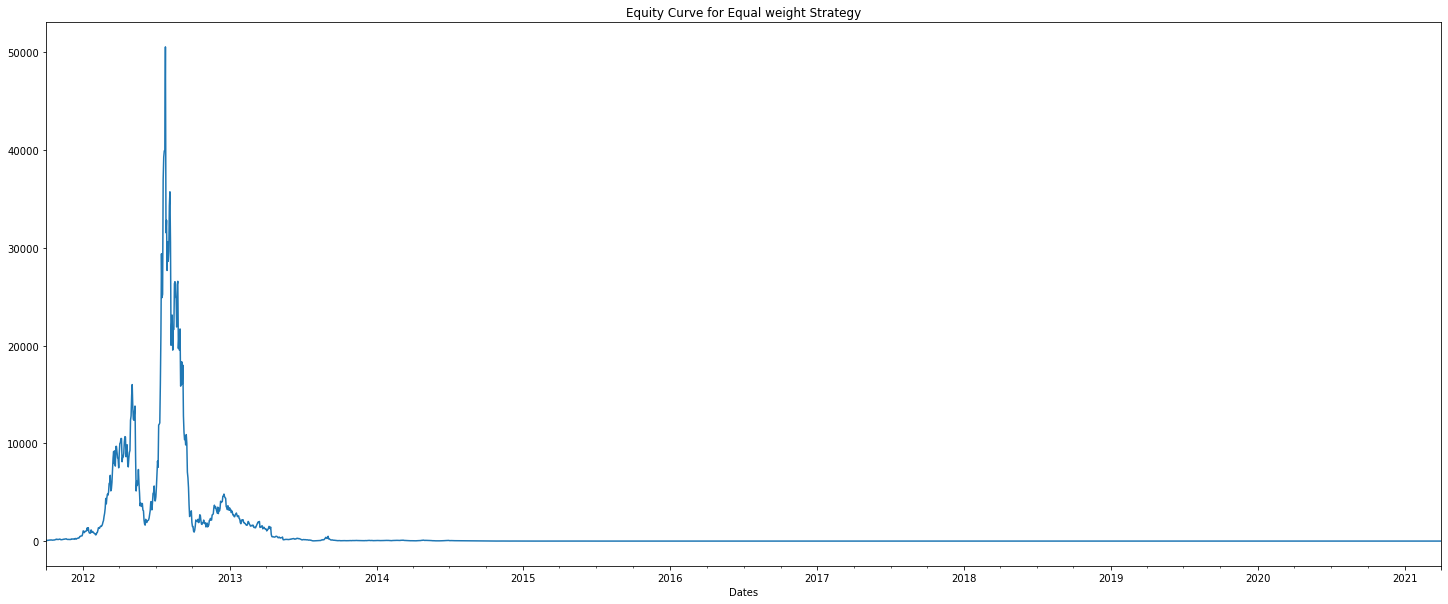

In [49]:
plt.figure(figsize=(25,10))
my_df_pct['EW'] = ((my_df_pct['Total Return'] + 1).cumprod()) * 100

my_df_pct['EW'].plot()
plt.title('Equity Curve for Equal weight Strategy')
plt.show()

In [50]:
my_df_pct=my_df_pct[['Total Return','EW']]
my_df_pct.to_excel('ew.xlsx')

In [51]:
mult_df=my_df_pct
data=mult_df

In [52]:
#data=mult_df[['Total Return','Momentum']]
data['RV']=data['Total Return'].rolling(126).var()
data['RV']=np.sqrt(data['RV'])
data['RV']=data['RV']*np.sqrt(252)
data1=data.dropna()
data1['target']=0.15/data['RV']
data1['tr']=data1['Total Return']*data1['target']
#data['RV']=data['RV']*100
#data['log_m']=np.log(data['RV'])
data1['EW'] = ((data1['Total Return'] + 1).cumprod()) * 100
data1['vol_ew'] = ((data1['tr'] + 1).cumprod()) * 100


<ipython-input-52-6bffb453ad36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RV']=data['Total Return'].rolling(126).var()
<ipython-input-52-6bffb453ad36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RV']=np.sqrt(data['RV'])
<ipython-input-52-6bffb453ad36>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

<Figure size 1080x720 with 0 Axes>

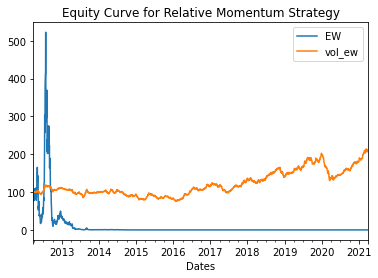

In [53]:
plt.figure(figsize=(15,10))
data1=data1[['EW','vol_ew']]
data1.plot()
plt.title('Equity Curve for Relative Momentum Strategy')
plt.show()

In [54]:
data1

,EW,vol_ew
Dates,,
2012-03-26,100.155859,100.010072
2012-03-27,93.614553,99.588784
2012-03-28,87.859878,99.190176
2012-03-29,86.891210,99.118530
2012-03-30,77.469709,98.417684
...,...,...
2021-03-26,0.015488,209.845429
2021-03-29,0.015373,209.709610
2021-03-30,0.014607,208.799603


<Figure size 1080x720 with 0 Axes>

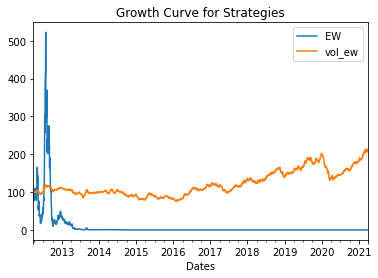

In [63]:
plt.figure(figsize=(15,10))
data1.plot()
plt.title('Growth Curve for Strategies')
plt.show()

In [272]:
my_df_pct['Total Return'].describe()

count    2479.000000
mean        0.007144
std         0.130341
min        -0.645294
25%        -0.068888
50%         0.005836
75%         0.079500
max         0.680664
Name: Total Return, dtype: float64

In [274]:
import seaborn as sns

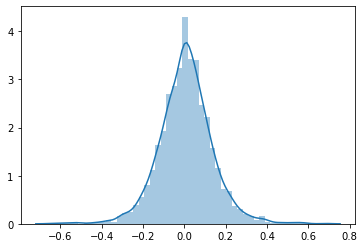

In [275]:
x = my_df_pct['Total Return'].values
ax = sns.distplot(x)

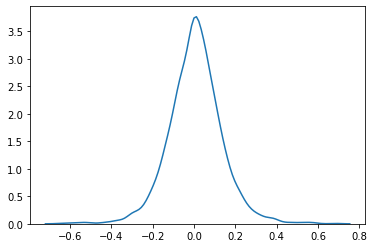

In [276]:
sns.kdeplot(x)

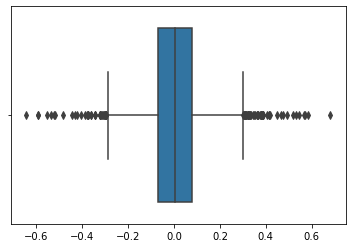

In [277]:
sns.boxplot(x)

In [100]:
data=my_df_pct[['Total Return','EW']]
data['RV']=data['Total Return'].rolling(126).var()
data['RV']=data['RV']*100
data['log_m']=np.log(data['RV'])

<ipython-input-100-b1834a70cce5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RV']=data['Total Return'].rolling(126).var()
<ipython-input-100-b1834a70cce5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RV']=data['RV']*100
<ipython-input-100-b1834a70cce5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [101]:
data.to_csv('btp.csv')

In [119]:
#my_df['AAPL'][:126].std()

,WLC1,O91,YUR1,IY1,T31,Y01,CCL1,S91,E61,U51,...,C71,H01,Q81,G01,GX1,INB1,T21,Q61,C21,IBW1
Dates,,,,,,,,,,,,,,,,,,,,,
2012-03-28,0.0103374,0.0104997,0.0106046,0.0272268,0.0141583,0.0153146,0.0132727,0.00852853,0.01116,0.0093723,...,0.0175244,0.0197743,0.0124495,0.0207367,0.0183305,0.00781351,0.00962937,0.0228243,0.0278055,0.0120343
2012-03-29,0.0103374,0.0104511,0.010655,0.0272285,0.0138963,0.0153669,0.0132427,0.00845375,0.0110491,0.00905583,...,0.0175843,0.0198618,0.0123726,0.020738,0.01831,0.00773433,0.00967385,0.0225418,0.0278303,0.0122247
2012-03-30,0.0103374,0.0104722,0.0106546,0.0272558,0.0138963,0.0153514,0.0132706,0.00844637,0.0110491,0.00894896,...,0.0175862,0.0195208,0.0123181,0.0207547,0.0183214,0.00766521,0.00965906,0.0225314,0.0276637,0.0122279
2012-04-02,0.0103374,0.0104815,0.0106037,0.027384,0.0138993,0.0149888,0.0132763,0.00851301,0.0110491,0.00894987,...,0.0175855,0.0198598,0.0124297,0.0207807,0.0183511,0.00766521,0.0096686,0.0225318,0.0276637,0.0122321
2012-04-03,0.0104638,0.0104632,0.0106037,0.0275158,0.0140543,0.0150571,0.0132752,0.00877108,0.0110534,0.00888922,...,0.0175042,0.0198895,0.0130559,0.0206821,0.0184785,0.00759234,0.00970657,0.0222911,0.0276264,0.0123302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,0,0.00988362,0,0.00430033,0,0.0129132,0.00907119,0.0128991,0,0.0101993,...,0.0162309,0,0.0122511,0.0103265,0,0,0.00605618,0.0186013,0.0122857,0.0100565
2021-03-29,0,0.00985677,0,0.00430033,0,0.0120183,0.00924052,0.0128995,0,0.0101875,...,0.0162062,0,0.0122314,0.0102991,0,0,0.00605912,0.0185897,0.0117094,0.00980907
2021-03-30,0,0.00988309,0,0.00430033,0,0.0120435,0.00930725,0.012899,0,0.010214,...,0.0162062,0,0.0122314,0.0102991,0,0,0.00605912,0.0185897,0.0117094,0.00980907


,WLC1,O91,YUR1,IY1,T31,Y01,CCL1,S91,E61,U51,...,C71,H01,Q81,G01,GX1,INB1,T21,Q61,C21,IBW1
Dates,,,,,,,,,,,,,,,,,,,,,
2012-03-28,8,9,11,31,17,19,15,4,12,5,...,24,26,14,27,25,3,6,29,32,13
2012-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
mult_df

,Total Return,Vol
Dates,,
2012-03-27,0.000000,10000.000000
2012-03-28,0.000000,10000.000000
2012-03-29,0.001844,10018.441492
2012-03-30,-0.002398,9994.413337
2012-04-02,0.003140,10025.792313
...,...,...
2021-03-26,0.000000,9820.746328
2021-03-29,0.000000,9820.746328
2021-03-30,0.000000,9820.746328


In [146]:
data=mult_df
data

,Total Return,Vol
Dates,,
2012-03-27,0.000000,10000.000000
2012-03-28,0.000000,10000.000000
2012-03-29,0.001844,10018.441492
2012-03-30,-0.002398,9994.413337
2012-04-02,0.003140,10025.792313
...,...,...
2021-03-26,0.000000,9820.746328
2021-03-29,0.000000,9820.746328
2021-03-30,0.000000,9820.746328


In [147]:
#data=mult_df[['Total Return','Momentum']]
data['RV']=data['Total Return'].rolling(126).var()
data['RV']=np.sqrt(data['RV'])
data['RV']=data['RV']*np.sqrt(252)
data1=data.dropna()
data1['target']=0.15/data['RV']
data1['tr']=data1['Total Return']*data1['target']
#data['RV']=data['RV']*100
#data['log_m']=np.log(data['RV'])
data1['VOL'] = ((data1['Total Return'] + 1).cumprod()) * 10000
data1['vol_VOL'] = ((data1['tr'] + 1).cumprod()) * 10000


<ipython-input-147-d874340e27e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RV']=data['Total Return'].rolling(126).var()
<ipython-input-147-d874340e27e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RV']=np.sqrt(data['RV'])
<ipython-input-147-d874340e27e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

# VALUE

In [45]:
my_df = pd.read_excel('commodity.xlsx')
my_df = pd.read_excel('commodity.xlsx')
my_df['Dates'] = pd.to_datetime(my_df['Dates'], dayfirst=False)
my_df.set_index('Dates', inplace=True)
my_df=my_df.dropna()

In [46]:
my_df_ranks = pd.DataFrame(columns=my_df.columns, index=my_df.index)

In [47]:
for i in range(len(my_df)):
    if i % rebal_freq == 0:
        my_df_ranks.iloc[i] = my_df.iloc[i].rank(axis=0, ascending=True)

In [48]:
my_df_ranks

,WLC1,O91,YUR1,IY1,T31,Y01,CCL1,S91,E61,U51,...,C71,H01,Q81,G01,GX1,INB1,T21,Q61,C21,IBW1
Dates,,,,,,,,,,,,,,,,,,,,,
2011-10-03,5,1,15,10,22,4,30,7,19,31,...,13,21,18,29,9,6,16,25,28,12
2011-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
my_df_ranks = my_df_ranks.shift(periods=1, axis=0)

In [50]:
my_df_ranks.ffill(inplace=True)

In [51]:
num_long=5

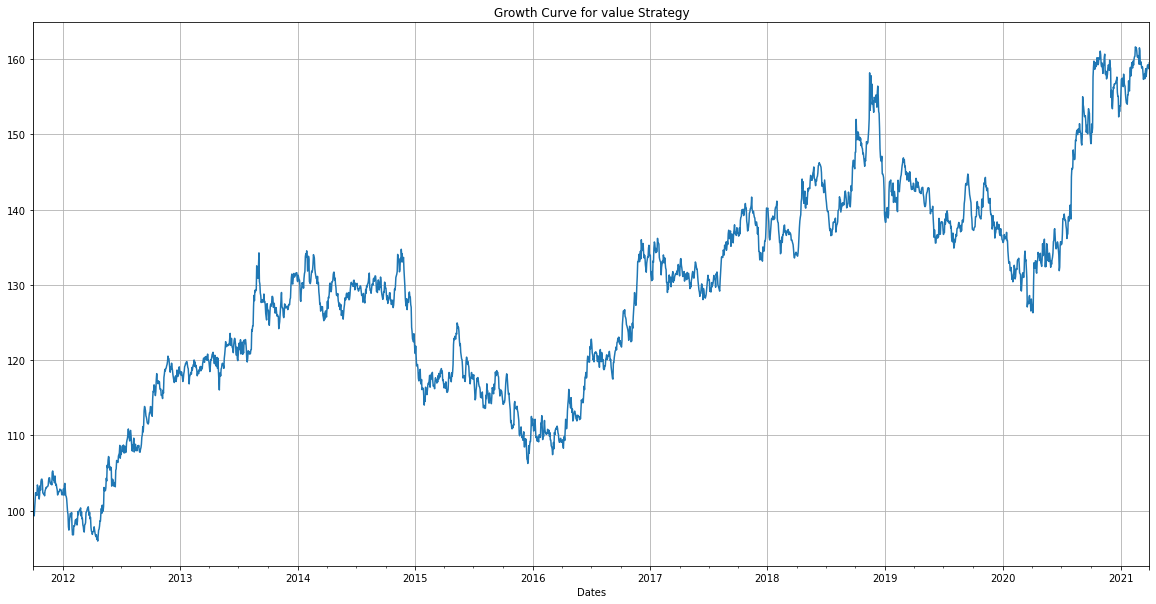

In [52]:
plt.figure(figsize=(20,10))
for col in my_df_ranks.columns:

    # if a stock has a rank in the top num_long values, we go long
    my_df_ranks.loc[my_df_ranks[col] <= num_long, col] = 1

    # if a stock has a rank in the bottom num_short values, we go short
    #my_df_ranks.loc[my_df_ranks[col] >= num_stocks, col] = -1

    # if a stock doesn't have a ranking in top or bottom n values, we have no position
    my_df_ranks.loc[(my_df_ranks[col] > num_long), col] = None
    
mult_df = (my_df.pct_change()) * my_df_ranks
mult_df['Total Return'] = (mult_df.sum(axis=1, skipna=True)) / (num_long)
#mult_df = mult_df[mom_period:]
mult_df['Value'] = ((mult_df['Total Return'] + 1).cumprod()) * 100

mult_df['Value'].plot()
plt.title('Growth Curve for value Strategy')
plt.grid()
plt.show()

In [14]:
mult_df['Total Return'].describe()

count    2479.000000
mean        0.000211
std         0.006687
min        -0.031501
25%        -0.003592
50%         0.000000
75%         0.003719
max         0.044753
Name: Total Return, dtype: float64

In [15]:
mult_df=mult_df[['Total Return','Value']]
mult_df.to_excel('value.xlsx')

In [145]:
data=mult_df[['Total Return','Value']]
data['RV']=data['Total Return'].rolling(126).var()
data['RV']=data['RV']*100
data['log_m']=np.log(data['RV'])
data=data['log_m'].dropna()
data.to_csv('btp.csv')

In [13]:
data=mult_df

In [14]:
data['RV']=data['Total Return'].rolling(126).var()
data['RV']=np.sqrt(data['RV'])
data['RV']=data['RV']*np.sqrt(252)
data1=data.dropna()
data1['target']=0.15/data1['RV']
data1['tr']=data1['Total Return']*data1['target']
#data['RV']=data['RV']*100
#data['log_m']=np.log(data['RV'])
data1['Value'] = ((data1['Total Return'] + 1).cumprod()) * 10000
data1['vol_Value'] = ((data1['tr'] + 1).cumprod()) * 10000


<ipython-input-14-936509e0ad83>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['target']=0.15/data['RV']
<ipython-input-14-936509e0ad83>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['tr']=data1['Total Return']*data1['target']
<ipython-input-14-936509e0ad83>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [15]:
data1=data1[['Value','vol_Value']]

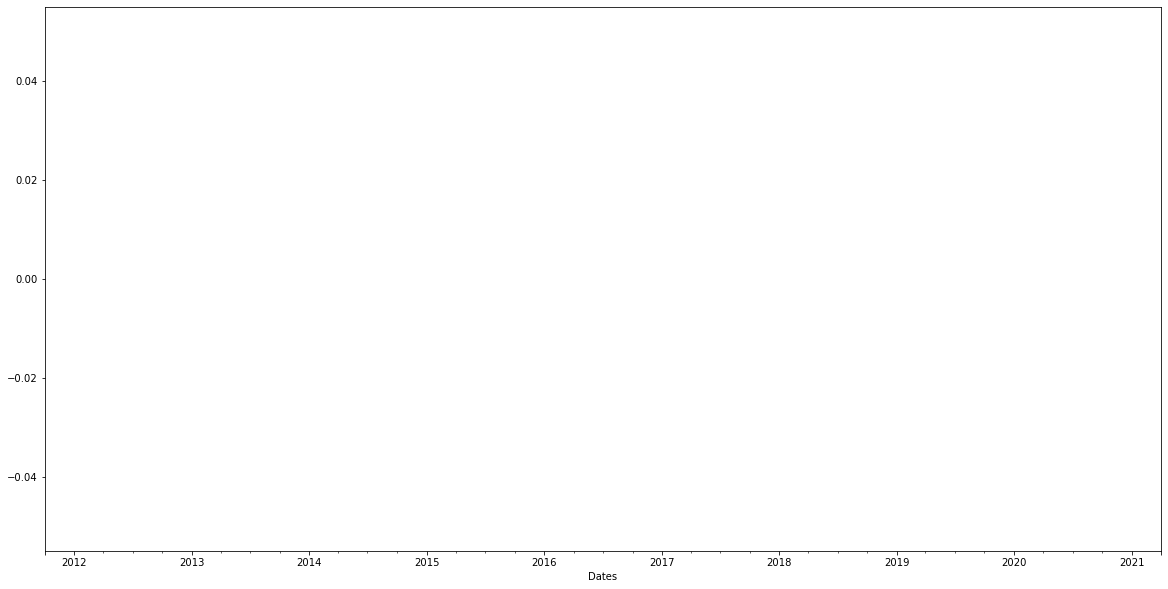

In [16]:
plt.figure(figsize=(20,10))
data1['Value'].plot()
data1['vol_Value'].plot()

# SKEWNESS

In [64]:
my_df = pd.read_excel('commodity.xlsx')
my_df = pd.read_excel('commodity.xlsx')
my_df['Dates'] = pd.to_datetime(my_df['Dates'], dayfirst=False)
my_df.set_index('Dates', inplace=True)
my_df=my_df.dropna()

In [65]:
df1=my_df.pct_change()
df1=df1.dropna()
stocks=df1.columns
my_df_skew = pd.DataFrame(columns=df1.columns, index=df1.index)
for s in stocks:    
    for i in range(126,df1.shape[0]):
        my_df_skew[s][i]=df1[s][i-126:i].skew()
    


In [66]:
my_df_skew=my_df_skew.dropna()

In [67]:
my_df_ranks = pd.DataFrame(columns=my_df_skew.columns, index=my_df_skew.index)

In [68]:
for i in range(len(my_df_skew)):
    if i % rebal_freq == 0:
        my_df_ranks.iloc[i] = my_df_skew.iloc[i].rank(axis=0, ascending=True)

In [69]:
my_df_ranks = my_df_ranks.shift(periods=1, axis=0)
my_df_ranks.ffill(inplace=True)
num_long=5
for col in my_df_ranks.columns:

    # if a stock has a rank in the top num_long values, we go long
    my_df_ranks.loc[my_df_ranks[col] <= num_long, col] = 1

    # if a stock has a rank in the bottom num_short values, we go short
    #my_df_ranks.loc[my_df_ranks[col] >= num_stocks, col] = -1

    # if a stock doesn't have a ranking in top or bottom n values, we have no position
    my_df_ranks.loc[(my_df_ranks[col] > num_long), col] = None

In [70]:
mult_df = (my_df.pct_change()) * my_df_ranks

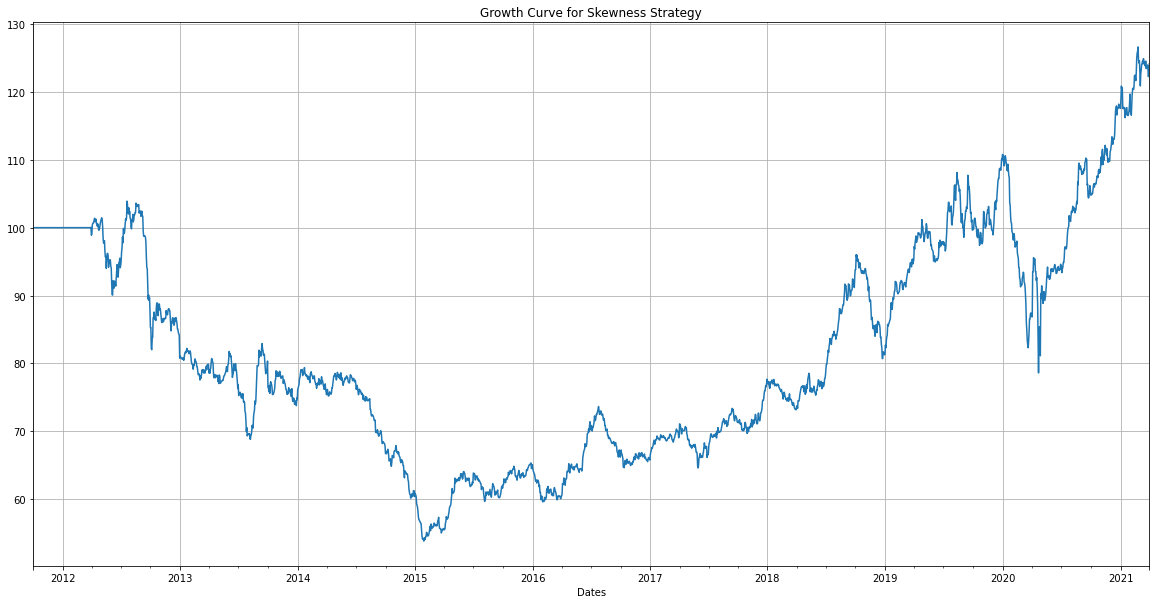

In [71]:
plt.figure(figsize=(20,10))
mult_df['Total Return'] = (mult_df.sum(axis=1, skipna=True)) / (num_long)
#mult_df = mult_df[mom_period:]
mult_df['Skewness'] = ((mult_df['Total Return'] + 1).cumprod()) * 100

mult_df['Skewness'].plot()
plt.title('Growth Curve for Skewness Strategy')
plt.grid()
plt.show()

In [72]:
mult_df['Total Return'].describe()

count    2479.000000
mean        0.000122
std         0.008382
min        -0.062640
25%        -0.003734
50%         0.000000
75%         0.003924
max         0.112839
Name: Total Return, dtype: float64

In [73]:
mult_df=mult_df[['Total Return','Skewness']]
mult_df.to_excel('skew.xlsx')

In [74]:
data=mult_df[['Total Return','Skewness']]
data['RV']=data['Total Return'].rolling(126).var()
data['RV']=data['RV']*100
data['log_m']=np.log(data['RV'])
data=data['log_m'].dropna()
data.to_csv('btp.csv')

C:\Users\YASH\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [85]:
data=mult_df

In [86]:
data['RV']=data['Total Return'].rolling(126).var()
data['RV']=np.sqrt(data['RV'])
data['RV']=data['RV']*np.sqrt(252)
data1=data.dropna()
data1['target']=0.15/data['RV']
data1['tr']=data1['Total Return']*data1['target']
#data['RV']=data['RV']*100
#data['log_m']=np.log(data['RV'])
data1['Skew'] = ((data1['Total Return'] + 1).cumprod()) * 100
data1['vol_Skew'] = ((data1['tr'] + 1).cumprod()) * 100


<ipython-input-86-999b3db64ab0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['target']=0.15/data['RV']
<ipython-input-86-999b3db64ab0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['tr']=data1['Total Return']*data1['target']
<ipython-input-86-999b3db64ab0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

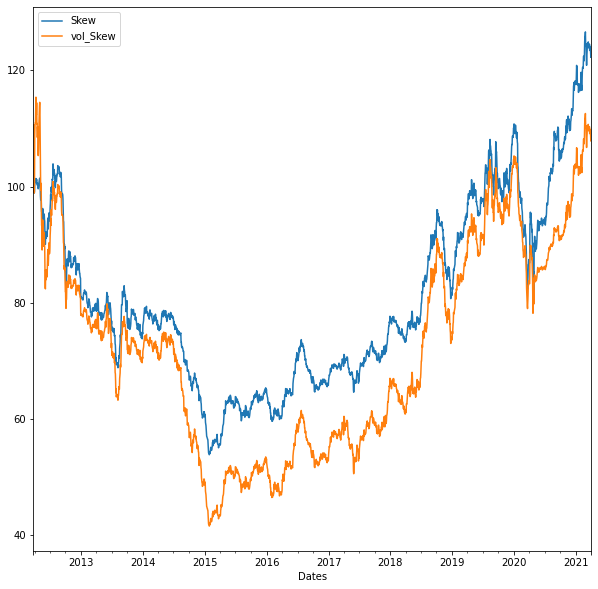

In [87]:
plt.figure(figsize=(10,10))
data1['Skew'].plot()
data1['vol_Skew'].plot()
plt.legend()

In [88]:
data=pd.read_excel('mom.xlsx')

In [89]:
data=data.set_index('Dates')

In [91]:
data=data.drop('vol',axis=1)

In [92]:
data.corr()


,mom,value,ew,skew
mom,1.000000,0.287576,0.645607,0.509959
value,0.287576,1.000000,0.426106,0.398922
ew,0.645607,0.426106,1.000000,0.603596
skew,0.509959,0.398922,0.603596,1.000000


In [94]:
data.describe()

,mom,value,ew,skew
count,2353.000000,2353.000000,2353.000000,2353.000000
mean,0.000204,0.000222,0.005002,0.000047
std,0.009257,0.006709,0.129121,0.007754
min,-0.069165,-0.031501,-0.645294,-0.051913
25%,-0.005025,-0.003587,-0.070082,-0.003921
50%,0.000084,0.000000,0.004938,0.000000
75%,0.005379,0.003738,0.077104,0.004135
max,0.049989,0.044753,0.680664,0.053335


In [96]:
mult_df['value'] = ((data['value'] + 1).cumprod()) * 100
mult_df['mom'] = ((data['mom'] + 1).cumprod()) * 100
#mult_df['vol'] = ((data['vol'] + 1).cumprod()) * 100
mult_df['ew'] = ((data['ew'] + 1).cumprod()) * 100
mult_df['skew'] = ((data['skew'] + 1).cumprod()) * 100


In [97]:
mult_df=pd.DataFrame(index=data.index,columns=data.columns)

In [98]:
mult_df.to_excel('mult_df.xlsx')

In [42]:
data=df

In [44]:
data=pd.DataFrame(df)

In [45]:
Sharpe_Ratio = (data['tr'].mean()-0.05/365)/ data['tr'].std()
ans=Sharpe_Ratio*np.sqrt(252)
ans

0.2542770412668339

In [57]:
Sharpe_Ratio = (data['skew'].mean())/ data['skew'].std()
ans=Sharpe_Ratio*np.sqrt(252)
ans

0.0957418743440162

In [46]:
from scipy.stats import kurtosis

In [47]:
kurtosis(data['tr'].values)

2.7909706666691205

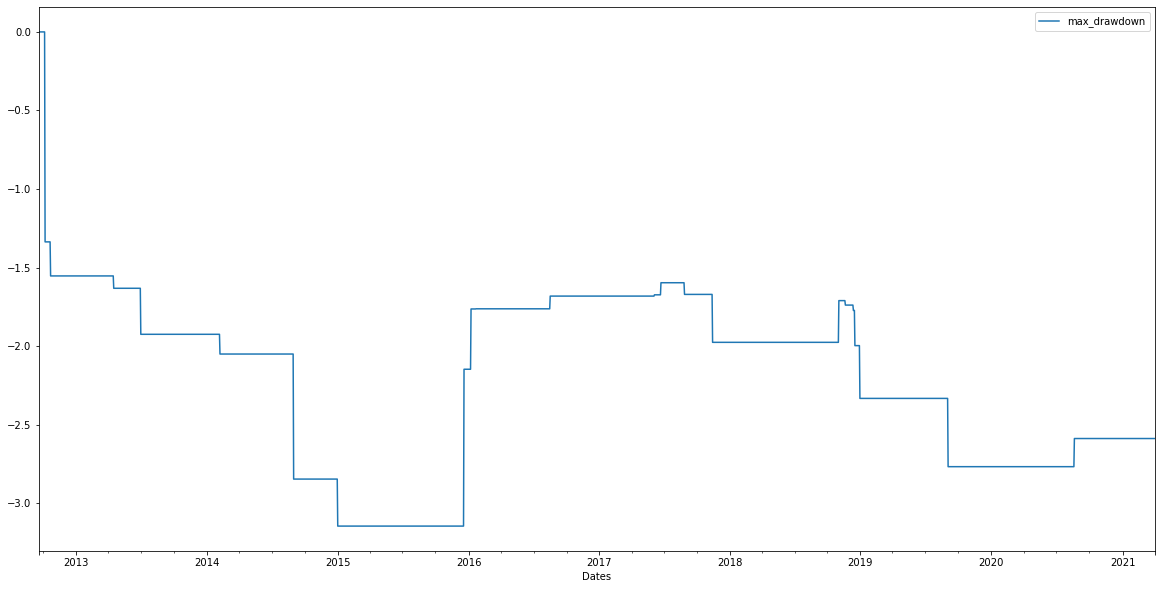

In [48]:
window = 252
plt.figure(figsize=(20,10))
# Calculate the max drawdown in the past window days for each day in the series.
# Use min_periods=1 if you want to let the first 252 days data have an expanding window
Roll_Max = data['tr'].rolling(window, min_periods=1).max()
Daily_Drawdown = data['tr']/Roll_Max - 1.0
#Roll_Max1 = data['ans'].rolling(window, min_periods=1).max()
#Daily_Drawdown1 = data['ans']/Roll_Max1 - 1.0
# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()

# Plot the results
#Daily_Drawdown.plot(label='nifty50')
#Daily_Drawdown1.plot(label='fund')

Max_Daily_Drawdown.plot(label='max_drawdown')
plt.legend()
plt.show()

In [49]:
Max_Daily_Drawdown.min()

-3.146334894083104

In [360]:
data=mult_df

In [361]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

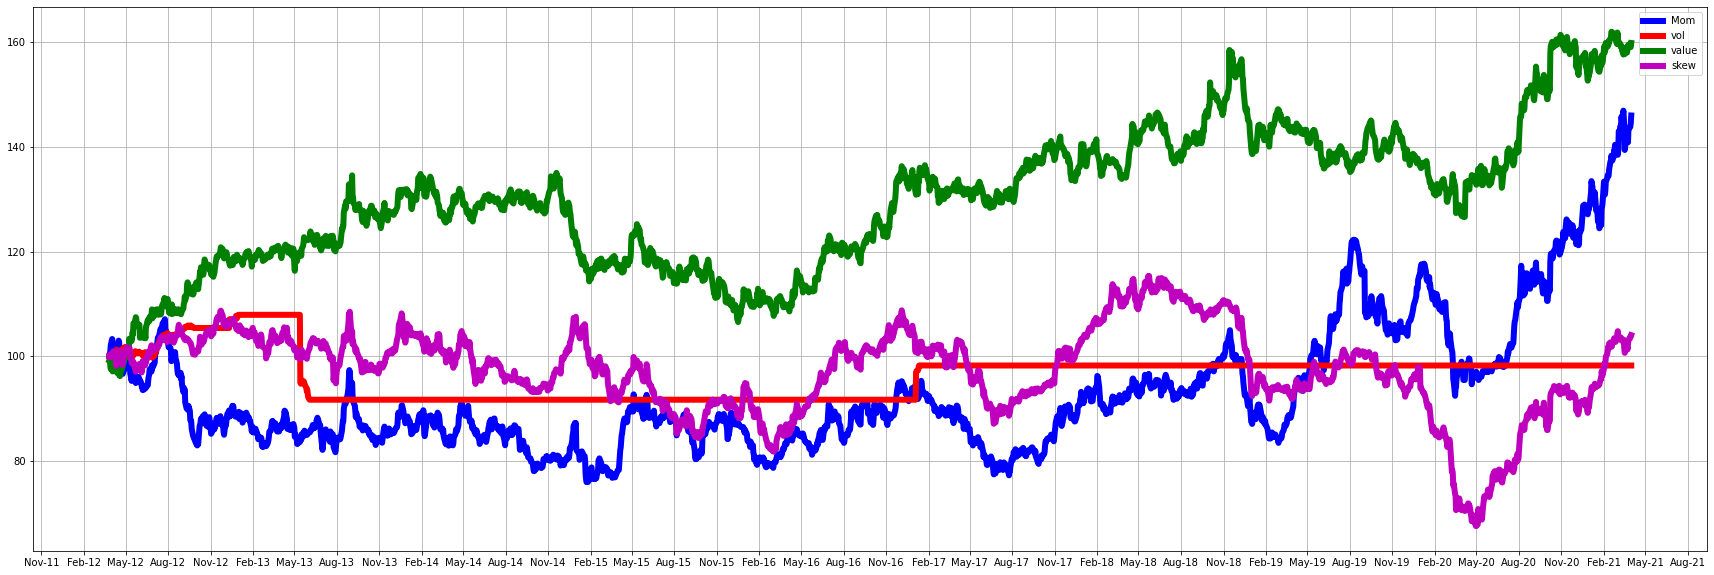

In [365]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,1,1)  
#plt.plot( x, y )
ax.plot(data.index.values,data['mom'].values, color="b",label='Mom',linewidth=6)
ax.plot(data.index.values,data['vol'].values, color="r",label='vol',linewidth=6)
ax.plot(data.index.values,data['value'].values, color="g",label='value',linewidth=6)
#ax.plot(data.index.values,data['ew'].values, color="c",label='ew',linewidth=6)
ax.plot(data.index.values,data['skew'].values, color="m",label='skew',linewidth=6)
#ax.plot(nifty.index.values,nifty['ans'].values, color="r",label='Fund',linewidth=6)
plt.legend()
ax.grid()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))     #optional formatting 

In [150]:
df=pd.read_excel('mom1.xlsx')

In [151]:
df=df.set_index('Dates')

In [152]:
df

,mom,vol_mom,vol,value,ew,skew
Dates,,,,,,
2012-09-18,9799.048018,9795.404896,10583.463855,11268.829555,7287.794292,10242.845470
2012-09-19,9799.048018,9795.404896,10587.464545,11235.527598,6687.457616,10242.845470
2012-09-20,9769.823797,9765.611795,10579.802671,11192.452803,5635.398883,10211.329023
2012-09-21,9614.821218,9608.970682,10555.436747,11187.192687,3821.815727,10165.590778
2012-09-24,9465.758461,9458.552315,10547.548425,11177.376169,2590.618614,10036.693037
...,...,...,...,...,...,...
2021-03-26,16013.256396,16959.079706,9820.746328,15957.428260,1.546427,10318.899568
2021-03-29,16052.742466,16994.777511,9820.746328,15963.628783,1.534943,10336.160665
2021-03-30,16066.397175,17007.311597,9820.746328,15928.162532,1.458473,10376.561134


In [172]:
from sklearn.linear_model import LinearRegression


In [183]:
y=df['vol_mom'].values

In [189]:
x=df[['mom','ew','value','skew']].values

In [190]:
x=np.array(x)
y=np.array(y)

In [191]:
x

array([[9.79904802e+03, 7.28779429e+03, 1.12688296e+04, 1.02428455e+04],
       [9.79904802e+03, 6.68745762e+03, 1.12355276e+04, 1.02428455e+04],
       [9.76982380e+03, 5.63539888e+03, 1.11924528e+04, 1.02113290e+04],
       ...,
       [1.60663972e+04, 1.45847349e+00, 1.59281625e+04, 1.03765611e+04],
       [1.61477359e+04, 1.52695191e+00, 1.59105821e+04, 1.03722548e+04],
       [1.63090652e+04, 1.70113593e+00, 1.59892225e+04, 1.04011755e+04]])

In [192]:
model = LinearRegression().fit(x, y)

In [193]:
model.score(x, y)

0.9859885422407482

In [130]:
import seaborn as sns


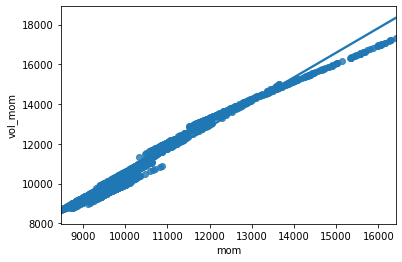

In [131]:
sns.regplot(x="mom", y="vol_mom", data=df);

In [137]:
model.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [160]:
import statsmodels.api as sm
from scipy import stats

In [161]:
est = sm.OLS(y, x)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.851e+06
Date:                Wed, 21 Apr 2021   Prob (F-statistic):                        0.00
Time:                        22:11:36   Log-Likelihood:                         -16402.
No. Observations:                2228   AIC:                                  3.281e+04
Df Residuals:                    2227   BIC:                                  3.281e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:
df=pd.read_excel('mom1.xlsx')

In [9]:
df

,Dates,mom,vol_mom,vol,value,ew,skew
0,2012-09-18,9799.048018,9795.404896,10583.463855,11268.829555,7287.794292,10242.845470
1,2012-09-19,9799.048018,9795.404896,10587.464545,11235.527598,6687.457616,10242.845470
2,2012-09-20,9769.823797,9765.611795,10579.802671,11192.452803,5635.398883,10211.329023
3,2012-09-21,9614.821218,9608.970682,10555.436747,11187.192687,3821.815727,10165.590778
4,2012-09-24,9465.758461,9458.552315,10547.548425,11177.376169,2590.618614,10036.693037
...,...,...,...,...,...,...,...
2223,2021-03-26,16013.256396,16959.079706,9820.746328,15957.428260,1.546427,10318.899568
2224,2021-03-29,16052.742466,16994.777511,9820.746328,15963.628783,1.534943,10336.160665
2225,2021-03-30,16066.397175,17007.311597,9820.746328,15928.162532,1.458473,10376.561134
2226,2021-03-31,16147.735894,17082.150828,9820.746328,15910.582114,1.526952,10372.254783


In [5]:
df=df['vol_mom']

In [6]:
df=pd.DataFrame(df)

In [7]:
df=df/100

,vol_mom
0,9795.404896
1,9795.404896
2,9765.611795
3,9608.970682
4,9458.552315
...,...
2223,16959.079706
2224,16994.777511
2225,17007.311597
2226,17082.150828
